In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Bookings.csv")

In [3]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [84]:
a= df.groupby('customer_id')['booking_id'].unique()

In [85]:
a

customer_id
customer_0                                          [booking_125]
customer_1                                          [booking_115]
customer_10                                         [booking_191]
customer_100                                        [booking_300]
customer_101                                         [booking_63]
                                      ...                        
customer_95                                         [booking_245]
customer_96                                         [booking_312]
customer_97     [booking_257, booking_143, booking_68, booking...
customer_98                                          [booking_79]
customer_99                                         [booking_241]
Name: booking_id, Length: 306, dtype: object

In [4]:
df1=pd.read_csv("Sessions.csv")

In [5]:
df1

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [6]:
# Find the number of distinct bookings,sessions, and searches from the given datasets

In [7]:
distinct_bookings = df['booking_id'].nunique()
distinct_sessions = df1['session_id'].nunique()
distinct_searches = df1['search_id'].nunique()


In [8]:
print("distinct_bookings : ", distinct_bookings)
print("distinct_sessions : ", distinct_sessions)
print("distinct_searches : ", distinct_searches)


distinct_bookings :  339
distinct_sessions :  331
distinct_searches :  1360


In [9]:
#How many sessions have more than one booking

In [10]:
total_sessions = df1.groupby('session_id')['booking_id'].nunique()
booking_sessions = (total_sessions > 1).sum()



In [11]:
pd.DataFrame(total_sessions)

,booking_id
session_id,
session_0,1
session_1,1
session_10,1
session_100,1
session_101,1
...,...
session_95,1
session_96,1
session_97,1


In [12]:
booking_sessions

10

In [13]:
# Which days of the week have the highest number of bookings? Also,draw a pie chart to show the distribution for all days of the week

In [14]:
print(df.columns)

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],
      dtype='object')


In [15]:
df['booking_time'] = pd.to_datetime(df['booking_time'])


In [16]:
df['booking_time']

0     2020-02-05 16:12:08+00:00
1     2018-11-21 08:21:47+00:00
2     2019-12-16 22:54:58+00:00
3     2021-10-29 12:25:38+00:00
4     2020-08-11 16:09:10+00:00
                 ...           
334   2020-02-14 14:20:20+00:00
335   2020-03-21 06:40:56+00:00
336   2020-01-31 20:35:35+00:00
337   2018-10-11 14:31:28+00:00
338   2022-07-11 18:46:59+00:00
Name: booking_time, Length: 339, dtype: datetime64[ns, UTC]

In [17]:
df['date'] = pd.to_datetime(df['booking_time'])

In [18]:
df['date']

0     2020-02-05 16:12:08+00:00
1     2018-11-21 08:21:47+00:00
2     2019-12-16 22:54:58+00:00
3     2021-10-29 12:25:38+00:00
4     2020-08-11 16:09:10+00:00
                 ...           
334   2020-02-14 14:20:20+00:00
335   2020-03-21 06:40:56+00:00
336   2020-01-31 20:35:35+00:00
337   2018-10-11 14:31:28+00:00
338   2022-07-11 18:46:59+00:00
Name: date, Length: 339, dtype: datetime64[ns, UTC]

In [19]:
df['weeks'] = df['date'].dt.day_name()

In [20]:
df['weeks']

0      Wednesday
1      Wednesday
2         Monday
3         Friday
4        Tuesday
         ...    
334       Friday
335     Saturday
336       Friday
337     Thursday
338       Monday
Name: weeks, Length: 339, dtype: object

In [21]:
day = df['weeks'].value_counts()

In [22]:
print(day)

weeks
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


In [23]:
highest_bookings_in_a_day = day.max()

In [24]:
print("highest bookings in a day is :", highest_bookings_in_a_day)

highest bookings in a day is : 65


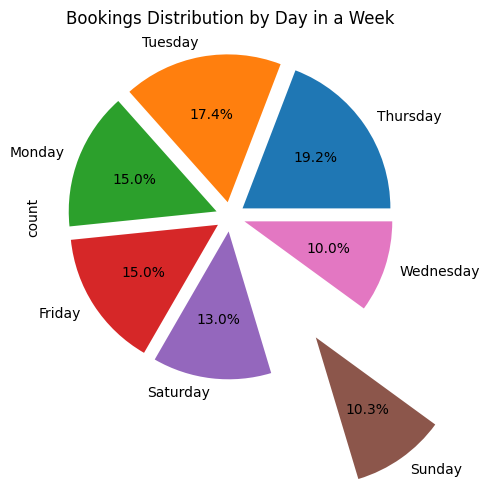

In [25]:
day.plot(kind='pie', autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1,1,0.1])
plt.title("Bookings Distribution by Day in a Week")
plt.show()

In [26]:
#For customers who have more than 1 booking, which is the most booked route (from_cityto to_city)

In [27]:
bookings = df.groupby('customer_id')['booking_id'].count()
customers = bookings[bookings > 1].index


In [28]:
bookings

customer_id
customer_0      1
customer_1      1
customer_10     1
customer_100    1
customer_101    1
               ..
customer_95     1
customer_96     1
customer_97     4
customer_98     1
customer_99     1
Name: booking_id, Length: 306, dtype: int64

In [29]:
customers.size

26

In [30]:
booked = df[df['customer_id'].isin(customers)]

In [31]:
booked

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,date,weeks
6,customer_28,booking_129,Kolkata,India,Gurgaon,India,2022-02-16 15:50:27+00:00,Desktop,13442.40,GOIBIBO,1.0,13.0,1310.7,2022-02-16 15:50:27+00:00,Wednesday
7,customer_217,booking_18,Bhubaneswar,India,Durlaga,India,2021-09-10 19:09:12+00:00,Desktop,4352.00,GOIBIBO,2.0,47.0,260.5,2021-09-10 19:09:12+00:00,Friday
13,customer_282,booking_212,Indore,India,Mumbai,India,2021-10-16 07:56:59+00:00,IOS,4725.60,GOIBIBO,1.0,0.0,506.2,2021-10-16 07:56:59+00:00,Saturday
16,customer_179,booking_218,Gurgaon,India,Port Blair,India,2020-01-12 17:34:59+00:00,Desktop,17804.80,MMT,2.0,35.0,2486.8,2020-01-12 17:34:59+00:00,Sunday
24,customer_179,booking_157,Mumbai,India,Jaipur,India,2020-01-23 13:58:39+00:00,Desktop,6953.60,GOIBIBO,1.0,15.0,921.8,2020-01-23 13:58:39+00:00,Thursday
29,customer_247,booking_119,Gurgaon,India,Fiumicino,Italy,2021-11-08 15:50:49+00:00,Android,21788.00,GOIBIBO,1.0,25.0,5932.6,2021-11-08 15:50:49+00:00,Monday
42,customer_137,booking_88,Gurgaon,India,Birmingham,United Kingdom,2019-12-22 08:49:25+00:00,IOS,46142.40,YATRA,1.0,19.0,7190.9,2019-12-22 08:49:25+00:00,Sunday
48,customer_49,booking_56,Gurgaon,India,Roissy-en-France,France,2021-10-11 05:01:16+00:00,IOS,22013.60,GOIBIBO,1.0,1.0,6564.2,2021-10-11 05:01:16+00:00,Monday
55,customer_245,booking_215,Pune,India,Nagpur,India,2020-01-28 16:48:38+00:00,Android,7241.46,MMT,1.0,7.0,621.7,2020-01-28 16:48:38+00:00,Tuesday
65,customer_246,booking_25,Delhi,India,Paris,France,2022-05-25 11:55:16+00:00,IOS,33216.00,GOIBIBO,1.0,9.0,6585.3,2022-05-25 11:55:16+00:00,Wednesday


In [32]:
booked.count()

customer_id          59
booking_id           59
from_city            59
from_country         59
to_city              59
to_country           59
booking_time         59
device_type_used     59
INR_Amount           59
service_name         59
no_of_passengers     59
days_to_departure    59
distance_km          59
date                 59
weeks                59
dtype: int64

In [33]:
most_booked_route = booked.groupby(['from_city', 'to_city']).size()

In [34]:
most_booked_route

from_city           to_city          
Ahmedabad           Gwalior              1
Barelā              Gurgaon              1
Bhubaneswar         Durlaga              1
Bikaner             Gurgaon              1
Bālāpur             Düsseldorf           2
Delhi               Jammu                1
                    Paris                1
                    Varanasi             1
                    Yol                  1
Devanhalli          Gurgaon              2
Dharamsala          Gurgaon              1
Durlaga             Bhubaneswar          2
Gurgaon             Bagdogra             2
                    Barelā               1
                    Berlin               1
                    Bhubaneswar          2
                    Birmingham           1
                    Dharamsala           1
                    Fiumicino            1
                    Frankfurt am Main    1
                    Hamburg              1
                    Lisbon               1
                

In [35]:
most_booked_routes = booked.groupby(['from_city', 'to_city']).size().sort_values(ascending=False).index[0]


In [36]:
most_booked_routes

('Gurgaon', 'Roissy-en-France')

In [37]:
# Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been atleast 5 departures from that city

In [38]:
df['booking_time'] = pd.to_datetime(df['booking_time'])
reference_date = pd.Timestamp("2018-09-04", tz="UTC") 
df['departure_date'] = df['days_to_departure'].apply(lambda x: reference_date + pd.Timedelta(days=x))
df['days_in_advance'] = (df['departure_date'] - df['booking_time']).dt.days

In [39]:
departure_counts = df['to_country'].value_counts()

In [40]:
departure_counts

to_country
India                   125
Germany                  74
France                   40
Italy                    36
United Kingdom           18
Netherlands               8
United Arab Emirates      7
Spain                     6
Belgium                   4
Portugal                  3
USA                       3
Switzerland               3
Czechia                   2
Thailand                  1
Canada                    1
Poland                    1
Maldives                  1
China                     1
Nigeria                   1
Turkey                    1
Nepal                     1
Latvia                    1
Malta                     1
Name: count, dtype: int64

In [41]:
valid_cities = departure_counts[departure_counts >= 5].index
filtered_df = df[df['to_country'].isin(valid_cities)]
avg_days_in_advance = (filtered_df.groupby('to_country')['days_in_advance'].mean().sort_values(ascending=False))

In [42]:
valid_cities 

Index(['India', 'Germany', 'France', 'Italy', 'United Kingdom', 'Netherlands',
       'United Arab Emirates', 'Spain'],
      dtype='object', name='to_country')

In [43]:
filtered_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,date,weeks,departure_date,days_in_advance
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00,Wednesday,2018-09-14 00:00:00+00:00,-510
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00,Monday,2018-10-06 00:00:00+00:00,-437
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00,Friday,2018-11-12 00:00:00+00:00,-1083
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00,Tuesday,2018-09-07 00:00:00+00:00,-705
5,customer_99,booking_241,Gurgaon,India,Roissy-en-France,France,2021-04-13 16:12:34+00:00,IOS,21843.20,GOIBIBO,1.0,11.0,6570.4,2021-04-13 16:12:34+00:00,Tuesday,2018-09-15 00:00:00+00:00,-942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,customer_67,booking_328,Devanhalli,India,Gurgaon,India,2020-10-15 14:43:32+00:00,Desktop,5635.73,MMT,1.0,2.0,1694.7,2020-10-15 14:43:32+00:00,Thursday,2018-09-06 00:00:00+00:00,-771
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14 14:20:20+00:00,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00,Friday,2018-09-30 00:00:00+00:00,-503
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56+00:00,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,2020-03-21 06:40:56+00:00,Saturday,2018-09-04 00:00:00+00:00,-565
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35+00:00,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00,Friday,2018-12-22 00:00:00+00:00,-406


In [44]:
avg_days_in_advance 

to_country
Italy                  -224.972222
United Arab Emirates   -505.285714
United Kingdom         -580.944444
Netherlands            -613.000000
Spain                  -655.333333
Germany                -710.040541
France                 -761.075000
India                  -785.136000
Name: days_in_advance, dtype: float64

In [45]:
print("Top 3 Departure Cities where customers book mostly in advance:", avg_days_in_advance.head(3))

Top 3 Departure Cities where customers book mostly in advance: to_country
Italy                  -224.972222
United Arab Emirates   -505.285714
United Kingdom         -580.944444
Name: days_in_advance, dtype: float64


In [46]:
# Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset,have the maximum correlation

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()


In [48]:
corr_matrix

,INR_Amount,no_of_passengers,days_to_departure,distance_km,days_in_advance
INR_Amount,1.000000,0.397229,0.284534,0.623565,-0.011721
no_of_passengers,0.397229,1.000000,0.187128,0.001698,0.014627
days_to_departure,0.284534,0.187128,1.000000,0.216972,0.023109
distance_km,0.623565,0.001698,0.216972,1.000000,0.228490
days_in_advance,-0.011721,0.014627,0.023109,0.228490,1.000000


In [49]:
np.fill_diagonal(corr_matrix.values, np.nan)
highest_corr = corr_matrix.unstack().dropna().sort_values(ascending=False).iloc[0]
highest_corr_columns = corr_matrix.unstack().dropna().sort_values(ascending=False).index[0]

In [50]:
highest_corr

0.6235653096997817

In [51]:
highest_corr_columns

('INR_Amount', 'distance_km')

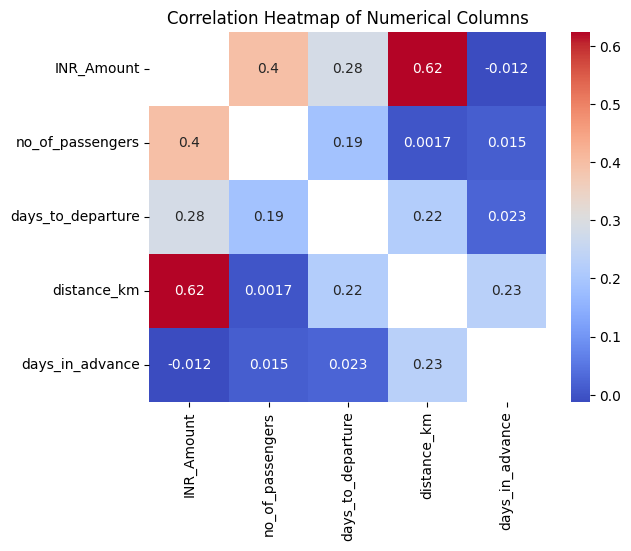

the pair of highest correlation is ('INR_Amount', 'distance_km') with correlation of 0.6235653096997817 


In [52]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()
print(f"the pair of highest correlation is {highest_corr_columns} with correlation of {highest_corr} ")

In [53]:
#For each service,which is the most used device type for making bookings on the platform

In [54]:
service_device_counts =df.groupby(['service_name', 'device_type_used']).size().reset_index(name='counts')

In [55]:
service_device_counts

,service_name,device_type_used,counts
0,GOIBIBO,Android,44
1,GOIBIBO,Desktop,61
2,GOIBIBO,IOS,70
3,GOIBIBO,MobileWeb,11
4,MMT,Android,8
5,MMT,Desktop,30
6,MMT,IOS,5
7,MMT,MobileWeb,5
8,YATRA,Android,18
9,YATRA,Desktop,51


In [56]:
most_used_device = service_device_counts.iloc[service_device_counts.groupby('service_name')['counts'].idxmax()]


In [57]:
most_used_device

,service_name,device_type_used,counts
2,GOIBIBO,IOS,70
5,MMT,Desktop,30
9,YATRA,Desktop,51


In [58]:
#Plot the trend sata quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

In [59]:
df['booking_time'] = pd.to_datetime(df['date'])
df['year_quarter'] = df['booking_time'].dt.to_period('Q')
quarterly_trends = df.groupby(['year_quarter', 'device_type_used']).size().unstack(fill_value=0)

C:\Users\chakr\AppData\Local\Temp\ipykernel_6416\2566011619.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_quarter'] = df['booking_time'].dt.to_period('Q')


In [60]:
quarterly_trends

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
year_quarter,,,,,
2018Q3,3,6,0,2,1
2018Q4,3,22,4,4,1
2019Q1,0,1,0,0,0
2019Q2,0,1,0,0,1
2019Q3,3,7,4,0,0
2019Q4,14,15,14,0,0
2020Q1,19,29,25,10,0
2020Q2,2,0,0,0,0
2020Q3,3,0,4,0,0


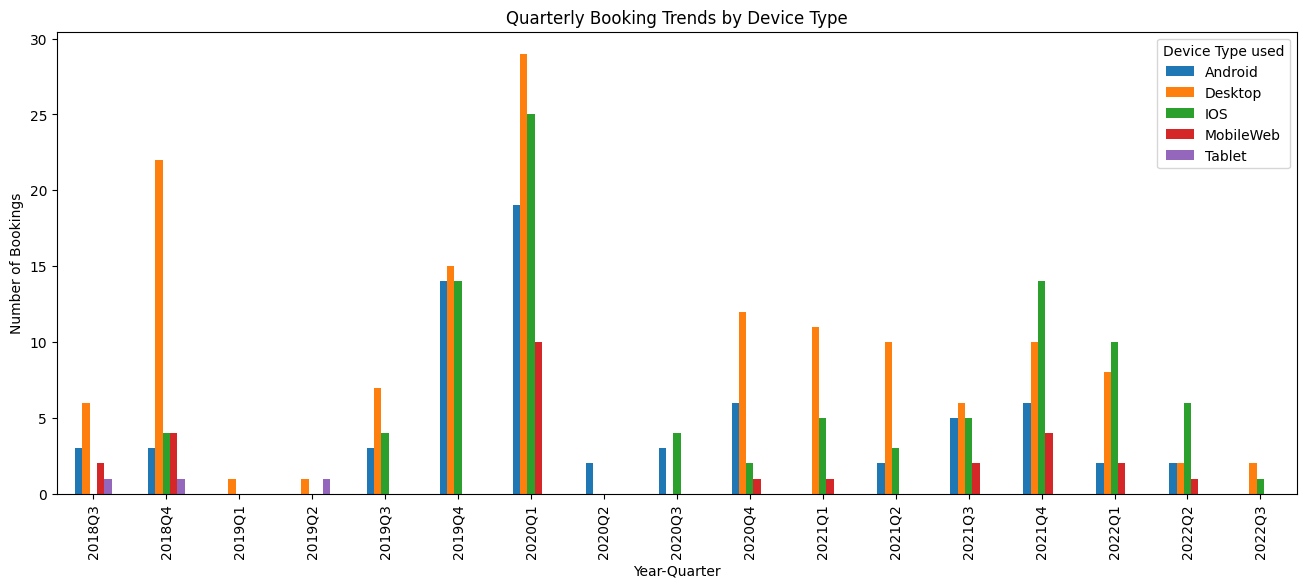

In [61]:
quarterly_trends.plot(kind='bar', figsize=(16, 6))
plt.title('Quarterly Booking Trends by Device Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type used')
plt.show()

In [62]:
# What is the average oBSR for each month of the year

In [63]:
df['booking_time'] = pd.to_datetime(df['booking_time'])
df1['search_time'] = pd.to_datetime(df1['search_time'], format="mixed")
df['booking_date'] = df['booking_time'].dt.date
df1['search_date'] = df1['search_time'].dt.date



In [64]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,date,weeks,departure_date,days_in_advance,year_quarter,booking_date
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00,Wednesday,2018-09-14 00:00:00+00:00,-510,2020Q1,2020-02-05
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21 08:21:47+00:00,Wednesday,2018-09-05 00:00:00+00:00,-78,2018Q4,2018-11-21
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00,Monday,2018-10-06 00:00:00+00:00,-437,2019Q4,2019-12-16
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00,Friday,2018-11-12 00:00:00+00:00,-1083,2021Q4,2021-10-29
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00,Tuesday,2018-09-07 00:00:00+00:00,-705,2020Q3,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14 14:20:20+00:00,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00,Friday,2018-09-30 00:00:00+00:00,-503,2020Q1,2020-02-14
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56+00:00,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,2020-03-21 06:40:56+00:00,Saturday,2018-09-04 00:00:00+00:00,-565,2020Q1,2020-03-21
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35+00:00,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00,Friday,2018-12-22 00:00:00+00:00,-406,2020Q1,2020-01-31
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28+00:00,Desktop,55152.80,YATRA,2.0,22.0,6760.0,2018-10-11 14:31:28+00:00,Thursday,2018-09-26 00:00:00+00:00,-16,2018Q4,2018-10-11


In [65]:
df1

,session_id,search_id,search_time,session_starting_time,booking_id,search_date
0,session_322,search_784,2020-01-21 21:35:38.910000+00:00,2020-01-21T21:10:12Z,NaN,2020-01-21
1,session_322,search_776,2020-01-21 21:37:37.697000+00:00,2020-01-21T21:10:12Z,NaN,2020-01-21
2,session_322,search_623,2020-01-21 21:36:11.392000+00:00,2020-01-21T21:10:12Z,NaN,2020-01-21
3,session_322,search_270,2020-01-21 21:16:07.685000+00:00,2020-01-21T21:10:12Z,NaN,2020-01-21
4,session_322,search_905,2020-01-21 21:34:55.673000+00:00,2020-01-21T21:10:12Z,NaN,2020-01-21
...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18 22:59:43.764000+00:00,2018-12-18T22:45:56Z,booking_120,2018-12-18
1493,session_120,search_1096,2021-12-23 17:29:37+00:00,2021-12-23T17:29:33.217Z,NaN,2021-12-23
1494,session_120,search_962,2021-12-23 17:34:39+00:00,2021-12-23T17:29:33.217Z,NaN,2021-12-23
1495,session_150,search_1306,2018-12-18 22:52:37.654000+00:00,2018-12-18T22:45:56Z,NaN,2018-12-18


In [66]:
daily_bookings = df.groupby('booking_date').size().rename('bookings')
daily_searches = df1.groupby('search_date').size().rename('searches')

In [67]:
daily_bookings

booking_date
2018-09-04    1
2018-09-11    2
2018-09-21    2
2018-09-23    1
2018-09-24    1
             ..
2022-06-04    1
2022-06-29    2
2022-07-01    1
2022-07-06    1
2022-07-11    1
Name: bookings, Length: 257, dtype: int64

In [68]:
daily_searches

search_date
2018-09-04     3
2018-09-11     2
2018-09-21     5
2018-09-23     1
2018-09-24     3
              ..
2022-06-04     1
2022-06-29    12
2022-07-01     4
2022-07-06     9
2022-07-11     3
Name: searches, Length: 263, dtype: int64

In [69]:
daily_data = pd.concat([daily_searches, daily_bookings], axis=1).fillna(0)
daily_data['oBSR'] = daily_data['bookings'] / daily_data['searches']

In [70]:
daily_data

,searches,bookings,oBSR
2018-09-04,3,1.0,0.333333
2018-09-11,2,2.0,1.000000
2018-09-21,5,2.0,0.400000
2018-09-23,1,1.0,1.000000
2018-09-24,3,1.0,0.333333
...,...,...,...
2022-06-04,1,1.0,1.000000
2022-06-29,12,2.0,0.166667
2022-07-01,4,1.0,0.250000
2022-07-06,9,1.0,0.111111


In [71]:
daily_data['month'] = pd.to_datetime(daily_data.index).month_name()
daily_data['weekday'] = pd.to_datetime(daily_data.index).day_name()

In [72]:
daily_data

,searches,bookings,oBSR,month,weekday
2018-09-04,3,1.0,0.333333,September,Tuesday
2018-09-11,2,2.0,1.000000,September,Tuesday
2018-09-21,5,2.0,0.400000,September,Friday
2018-09-23,1,1.0,1.000000,September,Sunday
2018-09-24,3,1.0,0.333333,September,Monday
...,...,...,...,...,...
2022-06-04,1,1.0,1.000000,June,Saturday
2022-06-29,12,2.0,0.166667,June,Wednesday
2022-07-01,4,1.0,0.250000,July,Friday
2022-07-06,9,1.0,0.111111,July,Wednesday


In [73]:
avg_obsr_per_month = daily_data.groupby('month')['oBSR'].mean().sort_index()

In [74]:
avg_obsr_per_month

month
April        0.423611
August       0.431746
December     0.436079
February     0.513558
January      0.384617
July         0.284710
June         0.683761
March        0.422279
May          0.389286
November     0.501276
October      0.435963
September    0.613300
Name: oBSR, dtype: float64

In [75]:
# What is the average oBSR for each day of the week

In [76]:
daily_data["weekday"]

2018-09-04      Tuesday
2018-09-11      Tuesday
2018-09-21       Friday
2018-09-23       Sunday
2018-09-24       Monday
                ...    
2022-06-04     Saturday
2022-06-29    Wednesday
2022-07-01       Friday
2022-07-06    Wednesday
2022-07-11       Monday
Name: weekday, Length: 263, dtype: object

In [77]:
avg_obsr_weekday = daily_data.groupby('weekday')['oBSR'].mean()


In [78]:
print("Average oBSR by Weekday:", avg_obsr_weekday)

Average oBSR by Weekday: weekday
Friday       0.430868
Monday       0.457111
Saturday     0.456856
Sunday       0.483129
Thursday     0.471516
Tuesday      0.553135
Wednesday    0.395871
Name: oBSR, dtype: float64


In [79]:
# Plot at imeseries of oBSR on all the given dates

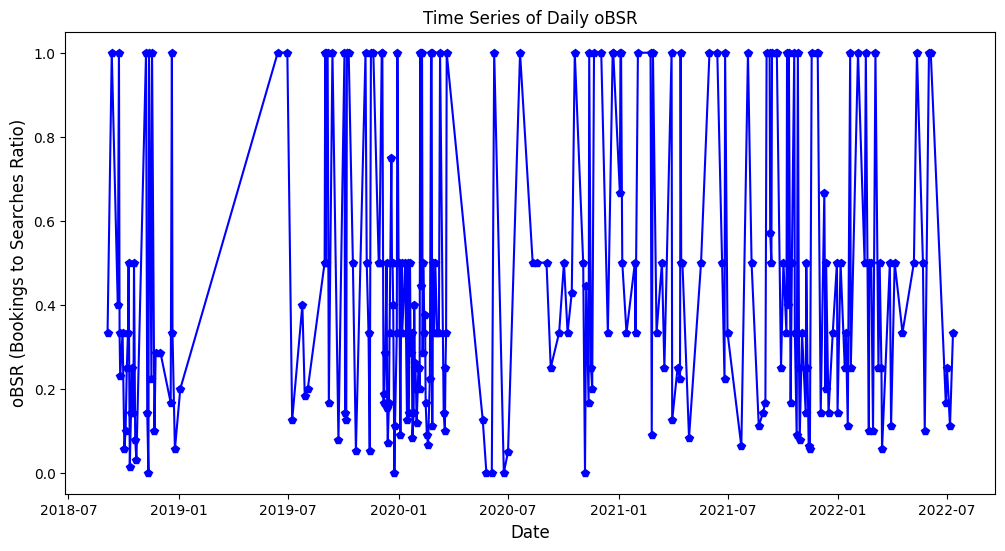

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['oBSR'], marker='p', linestyle='-', color='b')
plt.title("Time Series of Daily oBSR")
plt.xlabel("Date", fontsize=12)
plt.ylabel("oBSR (Bookings to Searches Ratio)", fontsize=12)
plt.show()